In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
# This allows Jupyter-inlined plots.
import matplotlib.pyplot as plt
%matplotlib inline 

In [300]:
df = pd.read_csv("Train value with labels_original_07.07.2021.csv")

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Funder and Installer have missing values

# Treating Outliers

## amount_tsh

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_tsh'>

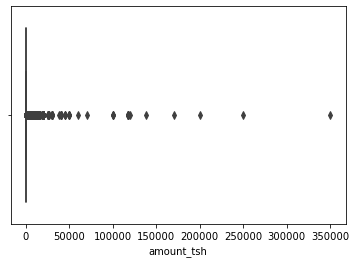

In [302]:
sns.boxplot(df['amount_tsh']) #outliers exist

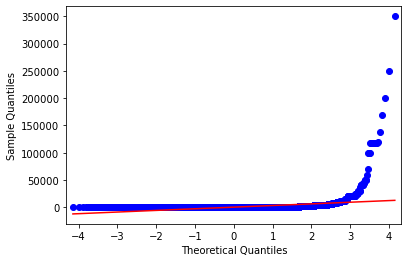

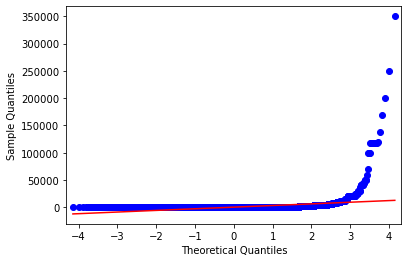

In [303]:
sm.qqplot(df['amount_tsh'],line='s')

In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

    If skewness is less than -1 or greater than 1, the distribution is highly skewed.
    If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
    If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [304]:
print(df['amount_tsh'].skew()) #skewness

57.8077999458852


In [305]:
print(df['amount_tsh'].describe())

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64


In [306]:
print(df['amount_tsh'].sort_values(ascending=False)[:5])
print("\n")
print(df['amount_tsh'].sort_values(ascending=True)[:5])

10812    350000.0
22191    250000.0
22817    200000.0
45067    170000.0
9961     138000.0
Name: amount_tsh, dtype: float64


29699    0.0
36128    0.0
36129    0.0
36131    0.0
36132    0.0
Name: amount_tsh, dtype: float64


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_tsh', ylabel='Density'>

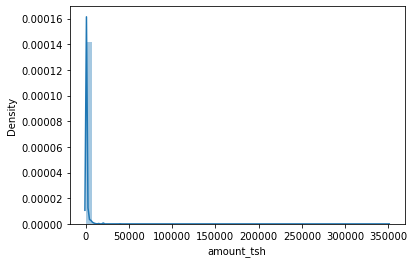

In [307]:
sns.distplot(df['amount_tsh'])

## gps_height

In [308]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gps_height'>

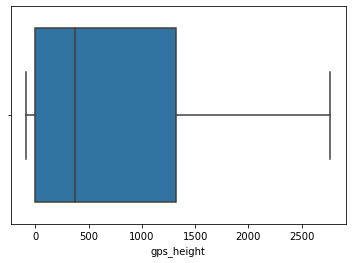

In [309]:
sns.boxplot(df['gps_height']) #outliers do not exist

In [310]:
print(df['gps_height'].skew()) #skewness - looks good!

0.4624020849809572


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gps_height', ylabel='Density'>

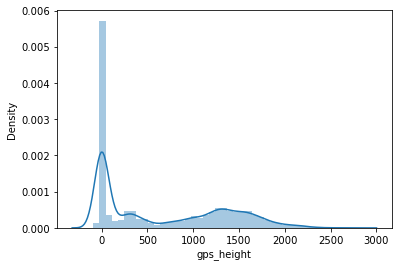

In [311]:
sns.distplot(df['gps_height'])

___________________

## Handling Outliers

In [312]:
df1 = df.copy() #SCALING

#### Scaling

(array([5.9367e+04, 1.6000e+01, 4.0000e+00, 9.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.05970028e-01,  1.15702348e+01,  2.32464397e+01,  3.49226445e+01,
         4.65988494e+01,  5.82750543e+01,  6.99512591e+01,  8.16274640e+01,
         9.33036688e+01,  1.04979874e+02,  1.16656079e+02]),
 <BarContainer object of 10 artists>)

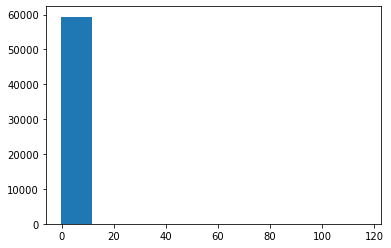

In [313]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df1['amount_tsh'] = scaler.fit_transform(df['amount_tsh'].values.reshape(-1,1))
plt.hist(df1['amount_tsh'])

57.8077999458852


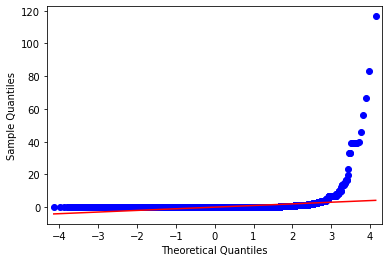

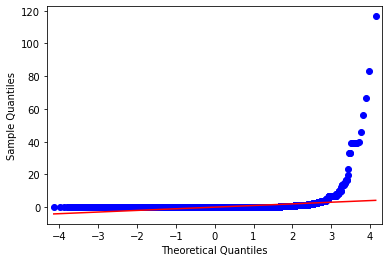

In [314]:
print(df1['amount_tsh'].skew()) #skewness
sm.qqplot(df1['amount_tsh'],line='s')

#### Log Transformation

In [315]:
df2 = df.copy()

In [316]:
df2["amount_tsh"] = df["amount_tsh"].map(lambda i: np.log(i) if i > 0 else 0) 

1.3459919707512598


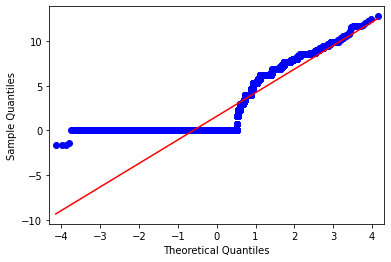

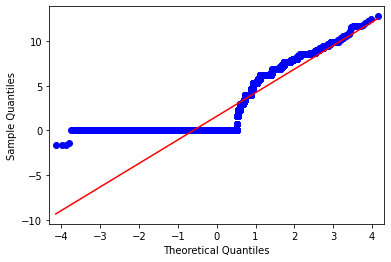

In [317]:
print(df2['amount_tsh'].skew()) #skewness
sm.qqplot(df2['amount_tsh'],line='s')

count    59400.000000
mean         1.578688
std          2.633716
min         -1.609438
25%          0.000000
50%          0.000000
75%          2.995732
max         12.765688
Name: amount_tsh, dtype: float64


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_tsh', ylabel='Density'>

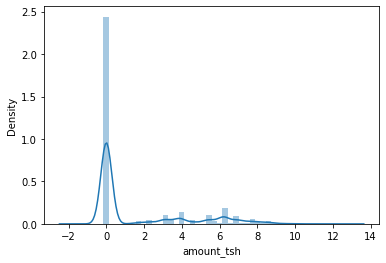

In [318]:
print(df2['amount_tsh'].describe())
sns.distplot(df2['amount_tsh'])

#### Median Transformation

#### 1. With Log Data

In [319]:
df3 = df2.copy()

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_tsh'>

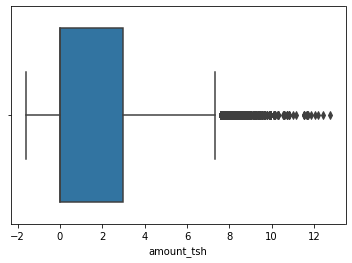

In [320]:
sns.boxplot(df3['amount_tsh'])

In [321]:
print(df3['amount_tsh'].quantile(0.50)) 
print(df3['amount_tsh'].quantile(0.95)) 

0.0
7.090076835776092


In [322]:
Q1=df3['amount_tsh'].quantile(0.25)
Q3=df3['amount_tsh'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

0.0
2.995732273553991
2.995732273553991


In [323]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-4.4935984103309865 7.489330683884978


In [324]:
df3_transf = df3[df3['amount_tsh']< Upper_Whisker]

In [325]:
df3_transf.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,56885.000000,56885.000000,56885.000000,56885.000000,5.688500e+04,56885.000000,56885.000000,56885.000000,56885.000000,56885.000000
mean,37128.478492,1.284810,641.641663,34.036595,-5.624905e+00,0.464340,15.463532,5.732689,179.242542,1273.829023
std,21456.217749,2.276537,687.975463,6.692415,2.945270e+00,12.378933,17.887936,9.769133,474.917900,959.752365
min,0.000000,-1.609438,-90.000000,0.000000,-1.158630e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18545.000000,0.000000,0.000000,33.066612,-8.451821e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.000000,0.000000,328.000000,34.880939,-4.917751e+00,0.000000,12.000000,3.000000,20.000000,1985.000000
75%,55685.000000,2.302585,1300.000000,37.208764,-3.310177e+00,0.000000,17.000000,5.000000,210.000000,2004.000000
max,74247.000000,7.313220,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_tsh'>

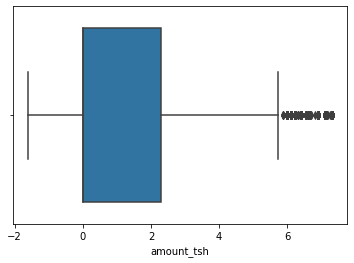

In [326]:
sns.boxplot(df3_transf['amount_tsh'])

1.4279349589943495


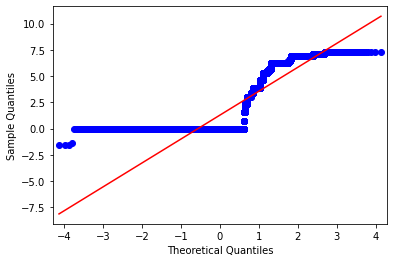

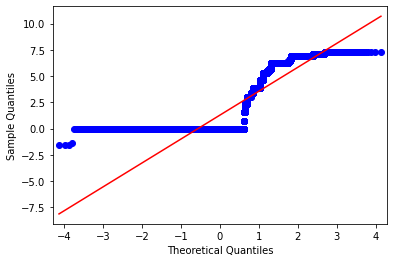

In [327]:
print(df3_transf['amount_tsh'].skew()) #skewness increased after median transformation...
sm.qqplot(df3_transf['amount_tsh'],line='s')

count    56885.000000
mean         1.284810
std          2.276537
min         -1.609438
25%          0.000000
50%          0.000000
75%          2.302585
max          7.313220
Name: amount_tsh, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


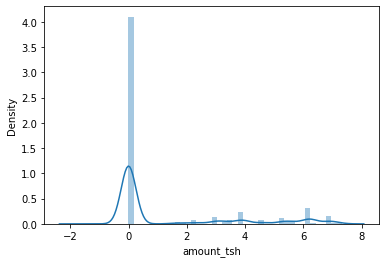

In [328]:
print(df3_transf['amount_tsh'].describe())
print(sns.distplot(df3_transf['amount_tsh']))

In [370]:
df3_transf.shape
df3_transf.to_excel('Train value with labels_edit_07.18.2021.xlsx', engine='xlsxwriter')

#### 2. With Original Data

Q1: 0.0
Q3: 20.0
IQR: 20.0
lower whisker: -30.0 
Upper Whisker: 50.0


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


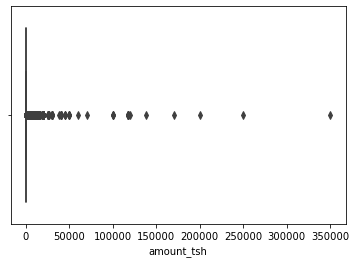

In [331]:
df4 = df.copy()

sns.boxplot(df4['amount_tsh'])
Q1=df4['amount_tsh'].quantile(0.25)
Q3=df4['amount_tsh'].quantile(0.75)
IQR=Q3-Q1

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')


Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

print(f"lower whisker: {Lower_Whisker} \nUpper Whisker: {Upper_Whisker}")


3.774520201448999


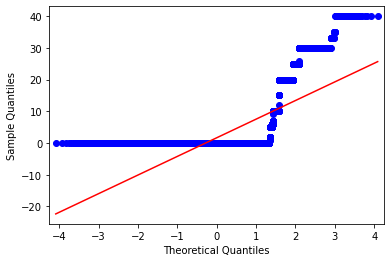

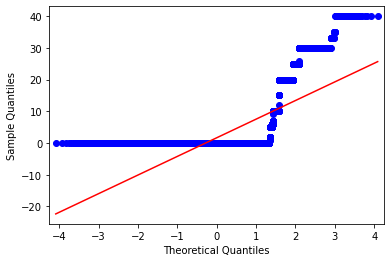

In [332]:
df4 = df4[df4['amount_tsh']< Upper_Whisker]
df4.describe()

print(df4['amount_tsh'].skew()) #skewness is reduced from 50+ to 3.7
sm.qqplot(df4['amount_tsh'],line='s')

count    45767.00000
mean         1.65217
std          5.87939
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         40.00000
Name: amount_tsh, dtype: float64


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


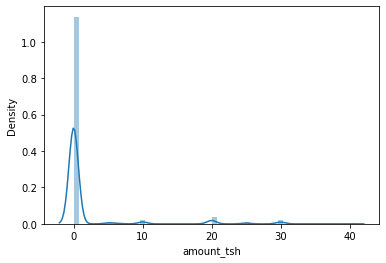

In [333]:
print(df4['amount_tsh'].describe())
print(sns.distplot(df4['amount_tsh']))

#### CubeRoot Transformation

# funder and installer fixing corrupt text

In [334]:
df5 = df.copy()

###### lets try to identify the common companies between funder and installer

In [336]:
import pandas as pd 
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

def checker(wrong_options,correct_options):
    names_array=[]
    ratio_array=[]    
    for wrong_option in wrong_options:
        if wrong_option in correct_options:
           names_array.append(wrong_option)
           ratio_array.append('100')
        else:   
            x=process.extractOne(wrong_option,correct_options,scorer=fuzz.token_set_ratio)
            names_array.append(x[0])
            ratio_array.append(x[1])
    return names_array,ratio_array

##### Unique list of values....

In [337]:
def unique(list1):
    # intilize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [338]:
funder = unique(df5['funder'])
installer = unique(df5['installer'])

In [339]:
print('Funder: ')
print(funder[:5])
print(len(funder))
print('\n')
print('Installer: ')
print(installer[:5])
print(len(installer))

Funder: 
['Roman', 'Grumeti', 'Lottery Club', 'Unicef', 'Action In A']
1898


Installer: 
['Roman', 'GRUMETI', 'World vision', 'UNICEF', 'Artisan']
2146


##### Fuzzy Matching the features

In [340]:
funder_full = df5['funder'].fillna('#####').tolist()
installer_full = df5['installer'].fillna('#####').tolist()

In [ ]:
#full values matching
name_match,ratio_match=checker(funder_full,installer_full)

In [ ]:
df_fz_full = pd.DataFrame()
df_fz_full['id'] = pd.Series(original['id'])
df_fz_full['funder']=pd.Series(funder_full)
df_fz_full['installer']=pd.Series(name_match)
df_fz_full['correct_ratio']=pd.Series(ratio_match)

In [270]:
#unique values matching
name_match,ratio_match=checker(funder,installer)

df_fz = pd.DataFrame()
df_fz['funder']=pd.Series(funder)
df_fz['installer']=pd.Series(name_match)
df_fz['correct_ratio']=pd.Series(ratio_match)

In [271]:
df_fz['correct_ratio']=df_fz['correct_ratio'].astype(str).astype(int)

In [341]:
df_fz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   funder         1897 non-null   object
 1   installer      1897 non-null   object
 2   correct_ratio  1898 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 37.2+ KB


In [273]:
df_fz.to_excel('matched_names.xlsx', engine='xlsxwriter')

### Once the fuzzy match is exported, I identified all account matches less than 89% ratio and index-matched them to original dataset and set them as "other"

In [297]:
df6 = pd.read_csv("Train value with labels_edit_07.18.2021.csv")

### Imputing the Missing Values - funder and installer

<AxesSubplot:>

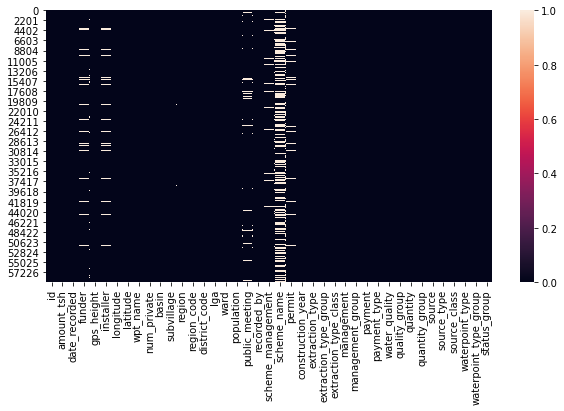

In [344]:
plt.figure(figsize=(10,5))
sns.heatmap(df6.isna()) #data is not missing at random, we can imputate it.

In [355]:
def othertransf(lst,dataframe):
    for x in lst:
        dataframe[x]=dataframe[x].fillna("other")

In [349]:
cols_to_impute = list(df6.select_dtypes(np.object).loc[: ,df6.isna().sum()> 0].columns)[:2]
print(cols_to_impute)

['funder', 'installer']


In [354]:
#BEFORE
print(f"NULL values for 'funder': {df6['funder'].isnull().sum()}")
print(f"NULL values for 'installer': {df6['installer'].isnull().sum()}")

NULL values for 'funder': 3635
NULL values for 'installer': 3655


In [356]:
#Imputing
othertransf(cols_to_impute,df6)


In [357]:
#AFTER
print(f"NULL values for 'funder': {df6['funder'].isnull().sum()}")
print(f"NULL values for 'installer': {df6['installer'].isnull().sum()}")

NULL values for 'funder': 0
NULL values for 'installer': 0


In [369]:
df6['installer'].value_counts()

other                31664
Government            1825
RWE                   1206
Commu                 1060
KKKT                   898
                     ...  
Humfreys Co              1
JALCA                    1
Centra Government        1
Baadela                  1
Mwita Mahiti             1
Name: installer, Length: 1776, dtype: int64

In [368]:
print(f"funder has # of other: {df6.loc[df6['funder']=='other'].count()['funder']}")
print(f"installer has # of other: {df6.loc[df6['installer']=='other'].count()['installer']}") #31,664 are a lot of Other values....

funder has # of other: 6389
installer has # of other: 31664


________

In [371]:
df6.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,1.000000,0.000649,0.009890,0.042891,0.045361,0.054809,0.940508,0.940546,0.552522,0.010082,...,-0.006593,-0.003624,-0.001629,-0.001629,-0.002486,-0.000839,0.005235,-0.001689,0.000231,-0.001624
amount_tsh,0.000649,1.000000,-0.038765,-0.016469,0.225565,-0.007004,0.022839,0.022769,-0.018613,0.018267,...,-0.069713,-0.075785,-0.129677,-0.129677,-0.014484,-0.014478,0.085647,-0.167683,-0.167616,-0.125189
date_recorded,0.009890,-0.038765,1.000000,0.013710,-0.061653,0.013121,0.001527,0.001609,0.019261,-0.012446,...,-0.031733,-0.027252,0.011861,0.011861,0.000278,-0.001530,0.000740,0.005475,0.011004,-0.005932
funder,0.042891,-0.016469,0.013710,1.000000,0.037415,0.528245,0.046856,0.047047,0.024354,-0.004859,...,-0.001215,0.001119,0.001695,0.001695,-0.002916,-0.000542,0.018238,0.038773,0.038296,-0.036631
gps_height,0.045361,0.225565,-0.061653,0.037415,1.000000,0.032532,0.091864,0.091743,-0.019089,0.045389,...,-0.058767,-0.057158,-0.088681,-0.088681,-0.082731,-0.089103,0.055094,-0.154355,-0.136941,-0.048207
installer,0.054809,-0.007004,0.013121,0.528245,0.032532,1.000000,0.061039,0.061016,0.033759,-0.001652,...,0.009430,0.016178,0.011151,0.011151,0.002973,0.002625,0.024710,0.037828,0.031438,-0.027423
longitude,0.940508,0.022839,0.001527,0.046856,0.091864,0.061039,1.000000,0.999900,0.542144,0.014313,...,-0.035684,-0.019167,-0.000906,-0.000906,-0.035108,-0.033626,0.018191,-0.038435,-0.028578,-0.018156
latitude,0.940546,0.022769,0.001609,0.047047,0.091743,0.061016,0.999900,1.000000,0.542269,0.014368,...,-0.035440,-0.019127,-0.000801,-0.000801,-0.035087,-0.033603,0.018242,-0.038376,-0.028512,-0.018109
wpt_name,0.552522,-0.018613,0.019261,0.024354,-0.019089,0.033759,0.542144,0.542269,1.000000,0.025529,...,-0.011955,-0.010076,-0.016745,-0.016745,0.043993,0.047462,0.004679,0.037357,0.039989,0.011926
num_private,0.010082,0.018267,-0.012446,-0.004859,0.045389,-0.001652,0.014313,0.014368,0.025529,1.000000,...,-0.012167,-0.011056,-0.025757,-0.025757,-0.004469,-0.003768,0.038189,-0.045921,-0.041747,-0.007243
